# INTERNSAVY

# Data Science Internship
# - Anisha Walde

# Task 2: Use Clustering Techniques for the Customer dataset using ML. 

**Objective:** To perform K-Means clustering on a customer dataset, identify customer segments based on their annual income and spending score, and provide insights and visualizations for better understanding of customer behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
dt = pd.read_csv("Mall_Customers.csv")

In [3]:
dt.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dt.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
dt.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
dt.index

RangeIndex(start=0, stop=200, step=1)

In [7]:
dt.shape

(200, 5)

In [24]:
dt.size

1400

In [8]:
dt.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
dt.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
X = dt.iloc[:, [3, 4]].values

# Determine the optimal number of clusters

In [12]:
from sklearn.cluster import KMeans
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

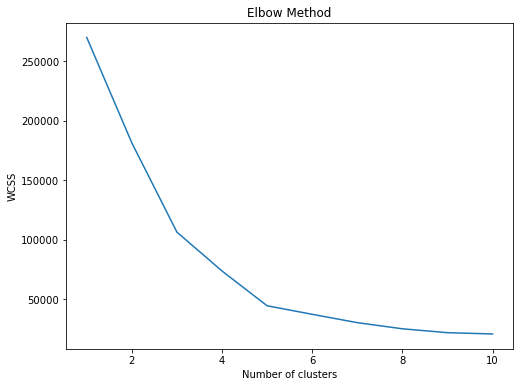

In [13]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means clustering with the chosen K value

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [15]:
dt['Cluster'] = kmeans.labels_

# Visualize the clusters

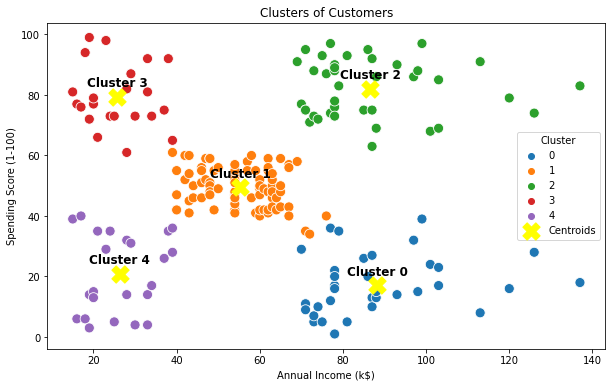

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                data=dt, palette='tab10', s=100)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')

# Annotate cluster centroids
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), fontsize=12, weight='bold',
                 textcoords='offset points', xytext=(0, 10), ha='center')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


# Interpretation and analysis of the clusters

In [17]:
# Calculate cluster statistics
cluster_means = dt.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 88.200000               17.114286
1                 55.296296               49.518519
2                 86.538462               82.128205
3                 25.727273               79.363636
4                 26.304348               20.913043


In [18]:
# Count the number of data points in each cluster
cluster_counts = dt['Cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)


Cluster Counts:
1    81
2    39
0    35
4    23
3    22
Name: Cluster, dtype: int64


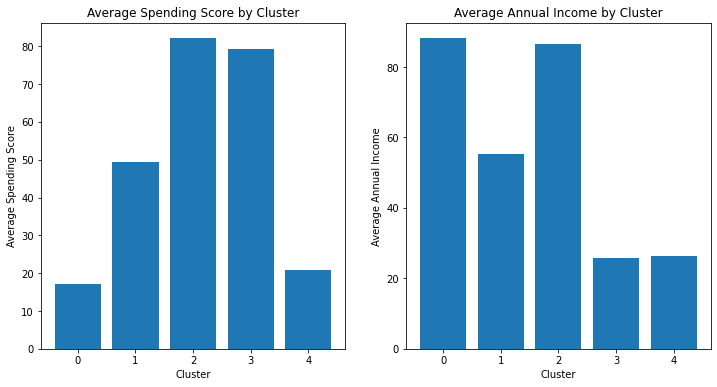

In [19]:
# Visualize cluster characteristics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Average Spending Score by Cluster')
plt.bar(cluster_means.index, cluster_means['Spending Score (1-100)'])
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score')

plt.subplot(1, 2, 2)
plt.title('Average Annual Income by Cluster')
plt.bar(cluster_means.index, cluster_means['Annual Income (k$)'])
plt.xlabel('Cluster')
plt.ylabel('Average Annual Income')
plt.show()

In [20]:
cluster_descriptions = {
    0: "High Income, Low Spending Score (Savers)",
    1: "Medium Income, Medium Spending Score (Average Shoppers)",
    2: "Low Income, High Spending Score (Impulsive Shoppers)",
    3: "High Income, High Spending Score (Big Spenders)",
    4: "Low Income, Low Spending Score (Careful Shoppers)"
}

dt['Cluster Description'] = dt['Cluster'].map(cluster_descriptions)


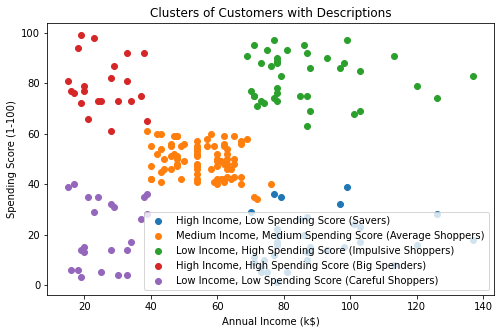

In [21]:
plt.figure(figsize=(8, 5))
for cluster_id in cluster_descriptions:
    cluster_dt = dt[dt['Cluster'] == cluster_id]
    plt.scatter(cluster_dt['Annual Income (k$)'], cluster_dt['Spending Score (1-100)'],
                label=cluster_descriptions[cluster_id])

plt.title('Clusters of Customers with Descriptions')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


**Thank You!**